In [67]:
from numpy import random, array, float
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [68]:
data = pd.read_csv("weather_dataset.csv")
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [69]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [70]:
data.shape

(142193, 24)

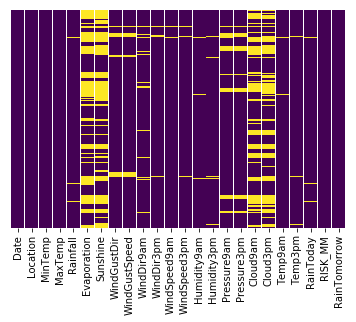

In [71]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [72]:
data=data.fillna(-1)

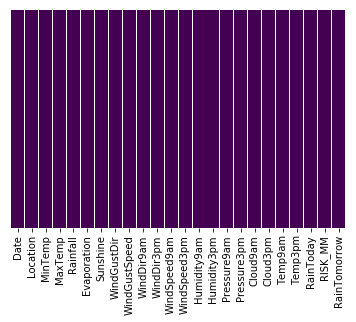

In [73]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [74]:
data['RainToday'].replace({'No':0,'Yes':1},inplace=True)
data['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

In [75]:
df=data.drop(['Date','Location','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm'],axis=1)

In [76]:
df = df.reindex(random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,19.6,27.1,0.0,-1.0,-1.0,6.0,6.0,84.0,85.0,-1.0,-1.0,-1.0,-1.0,22.1,21.5,0,4.6,1
1,5.7,22.4,0.0,3.0,10.2,19.0,19.0,79.0,39.0,1019.2,1014.0,1.0,6.0,11.5,21.3,0,0.0,0
2,7.9,13.5,0.0,2.6,1.8,15.0,30.0,84.0,69.0,1019.7,1019.4,7.0,6.0,10.0,10.8,0,2.4,1
3,21.3,26.4,0.0,-1.0,-1.0,11.0,33.0,82.0,79.0,1012.2,1010.3,-1.0,-1.0,23.6,25.2,0,14.0,1
4,12.2,22.9,0.0,3.6,10.8,24.0,22.0,50.0,37.0,1018.8,1015.9,1.0,1.0,17.1,20.7,0,0.0,0
5,7.9,19.0,0.0,-1.0,-1.0,13.0,22.0,64.0,61.0,1022.5,1020.2,-1.0,-1.0,12.0,15.3,0,0.0,0
6,6.7,24.9,0.0,1.4,-1.0,0.0,0.0,96.0,32.0,1018.2,1014.6,-1.0,-1.0,13.0,24.8,0,0.0,0
7,13.3,27.4,0.0,-1.0,-1.0,15.0,19.0,84.0,32.0,1018.6,1017.8,-1.0,-1.0,16.1,26.1,0,0.0,0
8,22.7,29.2,0.0,5.6,10.5,13.0,19.0,74.0,68.0,1011.8,1007.1,6.0,7.0,27.0,28.5,0,0.0,0
9,-0.9,13.6,0.0,-1.0,-1.0,0.0,15.0,98.0,75.0,1023.5,1022.0,-1.0,-1.0,2.5,13.4,0,0.0,0


In [92]:
X = df[["RainToday","Rainfall","MinTemp","MaxTemp","Sunshine","Temp9am","Temp3pm"]]
y=df["RainTomorrow"]

# TRAIN AND TEST DATA SPLIT

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# LOGISTIC REGRESSION MODEL

In [100]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter = 1000).fit(X_train, y_train)

In [101]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# ACCURACY

In [102]:
clf.score(X_test,y_test)

0.8004149231688878